<a href="https://colab.research.google.com/github/De78-cyber/Transfer_learning_Desafio/blob/main/Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow opencv-python-headless

In [28]:
!pip install matplotlib

In [29]:
import cv2
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [30]:
# Carregar modelo pré-treinado para detecção facial
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Saving IMG-20210309-WA0016.jpg to IMG-20210309-WA0016 (9).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


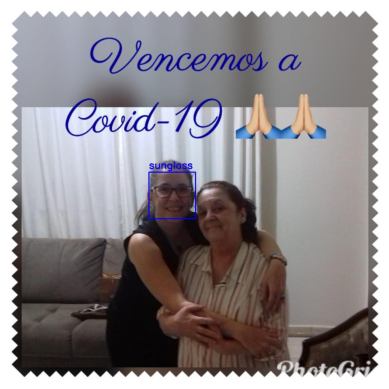

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
# Função para carregar e processar a imagem
def detect_faces(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    return faces

# Carregar o modelo pré-treinado para reconhecimento facial ( exemplo com MobileNetv2)
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Função para reconhecer faces
def recognize_faces(image, faces):
    for (x, y, w, h) in faces:
     face_img = image[y:y+h, x:x+w]
     face_img = cv2.resize(face_img,(224, 224))
     face_img = np.expand_dims(face_img, axis=0)
     face_img = tf.keras.applications.mobilenet_v2.preprocess_input(face_img)

     predictions = model.predict(face_img)
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)
    label = decoded_predictions[0] [0] [1]

    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return image


# Função principal
def process_image(image_path):
    image = cv2.imread(image_path)
    faces = detect_faces(image)
    if len(faces)== 0:
       print("Nenhuma face detectada.")
       return
    image_with_faces = recognize_faces(image, faces)
    save_image(image_with_faces, 'output_image.jpg')
    show_image('output_image.jpg')

    files.download('output_image.jpg')

def save_image(image, path):
    cv2.imwrite(path, image)

def show_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


uploaded = files.upload()

for filename in uploaded.keys():
    process_image(filename)

